In [21]:
import numpy as np 
from astropy.io import fits
import matplotlib.pyplot as plt
from glob import glob
import os
from astropy.visualization import ImageNormalize, AsinhStretch
from sunraster.instr.spice import read_spice_l2_fits
from sun_blinker import ImageBlinker
import astropy.units as u

In [2]:
saffron_dir = '../../src/SPICE/slimane/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000/con-06'

In [3]:
saffron_files = sorted(glob(os.path.join(saffron_dir, '*.fits')))
saffron_files

['../../src/SPICE/slimane/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000/con-06/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000_00702.70-o_3_con-06_time-240130T091516.fits',
 '../../src/SPICE/slimane/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000/con-06/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000_00703.87-o_3_con-06_time-240130T091516.fits',
 '../../src/SPICE/slimane/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000/con-06/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000_00706.02-mg_9_con-06_time-240130T091516.fits',
 '../../src/SPICE/slimane/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000/con-06/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000_00748.40-s_4_con-06_time-240130T091516.fits',
 '../../src/SPICE/slimane/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000/con-06/solo_L2.5_spice-n-ras_20221020T231536_V06_150995364-000_00749.54-mg_9_con-06_time-240130T091516.fits',
 '../../src/SPICE/slimane/solo_L2.5_spice-n

In [4]:
saffron_file_SV = [file for file in saffron_files if '786.47-s_5' in file][0]
saffron_file_OIV = [file for file in saffron_files if '787.72-o_4' in file][0]

In [5]:
saffron_SV_int = fits.getdata(saffron_file_SV, ext=0)
saffron_SV_header = fits.getheader(saffron_file_SV, ext=0)
saffron_OIV_int = fits.getdata(saffron_file_OIV, ext=0)
saffron_OIV_header = fits.getheader(saffron_file_OIV, ext=0)

In [6]:
saffron_SV_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  224                                                  
NAXIS2  =                  832                                                  
EXTEND  =                    T                                                  
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                112.5 / Pixel coordinate of reference point            
CRPIX2  =                416.5 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
PC1_1   =       0.993437010613 / Coordinate transformation matrix element       
PC1_2   =     -0.0313974558467 / Coordinate transformation matrix element       
PC2_1   =       0.4166868171

In [7]:
saffron_SV_header['CR*']

CRPIX1  =                112.5 / Pixel coordinate of reference point            
CRPIX2  =                416.5 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRVAL1  =    -0.11831583088917 / [deg] Coordinate value at reference point      
CRVAL2  =     0.15810177170111 / [deg] Coordinate value at reference point      
CRVAL3  =             6747.875 / [s] Coordinate value at reference point        
CRDER1  =       0.368764064878 / [deg] Random error in coordinate               
CRDER2  =       0.335117413068 / [deg] Random error in coordinate               
CRLN_OBS=        167.379060625 / [deg] Carrington heliographic lng of observer  
CRLT_OBS=        4.57998284872 / [deg] Heliographic latitude of observer        

In [8]:
saffron_OIV_header['CR*']

CRPIX1  =                112.5 / Pixel coordinate of reference point            
CRPIX2  =                416.5 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRVAL1  =    -0.11831583088917 / [deg] Coordinate value at reference point      
CRVAL2  =     0.15810177170111 / [deg] Coordinate value at reference point      
CRVAL3  =             6747.875 / [s] Coordinate value at reference point        
CRDER1  =       0.368764064878 / [deg] Random error in coordinate               
CRDER2  =       0.335117413068 / [deg] Random error in coordinate               
CRLN_OBS=        167.379060625 / [deg] Carrington heliographic lng of observer  
CRLT_OBS=        4.57998284872 / [deg] Heliographic latitude of observer        

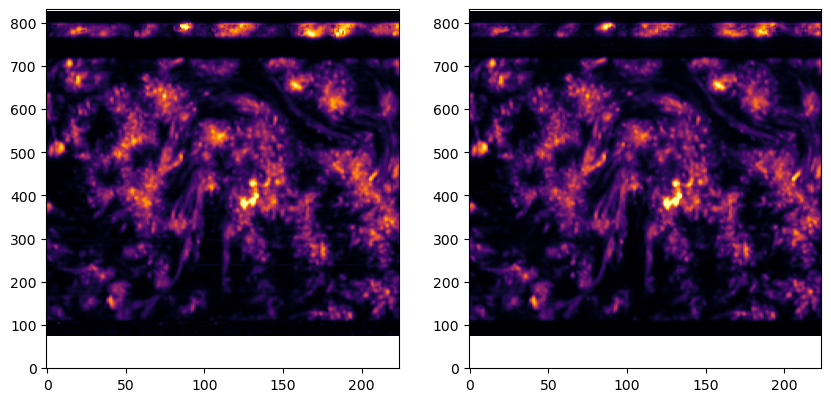

In [9]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(saffron_SV_int, origin='lower', cmap='inferno', aspect=saffron_SV_header['CDELT2']/saffron_SV_header['CDELT1'],
           norm=ImageNormalize(vmin=np.nanpercentile(saffron_SV_int, 0.1), vmax=np.nanpercentile(saffron_SV_int, 99.9), stretch=AsinhStretch(0.2)))

ax2.imshow(saffron_OIV_int, origin='lower', cmap='inferno', aspect=saffron_OIV_header['CDELT2']/saffron_OIV_header['CDELT1'],
              norm=ImageNormalize(vmin=np.nanpercentile(saffron_OIV_int, 0.1), vmax=np.nanpercentile(saffron_OIV_int, 99.9), stretch=AsinhStretch(0.2)))

In [10]:
ImageBlinker(saffron_SV_int, saffron_OIV_int, aspect=saffron_SV_header['CDELT2']/saffron_SV_header['CDELT1'])

In [11]:
spice_file = '../../src/SPICE/20221020/solo_L2_spice-n-ras_20221020T231536_V06_150995364-000_coalign.fits'
spice_cube = read_spice_l2_fits(spice_file)
spice_cube.keys()

Set MJD-OBS to 59872.969168 from DATE-OBS.
Set MJD-BEG to 59872.969168 from DATE-BEG.
Set MJD-AVG to 59873.047270 from DATE-AVG.
Set MJD-END to 59873.125369 from DATE-END'. [astropy.wcs.wcs]


dict_keys(['O III 703 / Mg IX 706 (Merged)', 'S IV 750 - Peak', 'N IV 765 - Peak', 'Ne VIII 770 - Peak', 'S V 786 / O IV 787 (Merged)', 'N III 991 (Merged)'])

In [16]:
spice_window = spice_cube['Ne VIII 770 - Peak']

In [22]:
spice_window_wvl = spice_window.spectral_axis.to_value(u.AA)

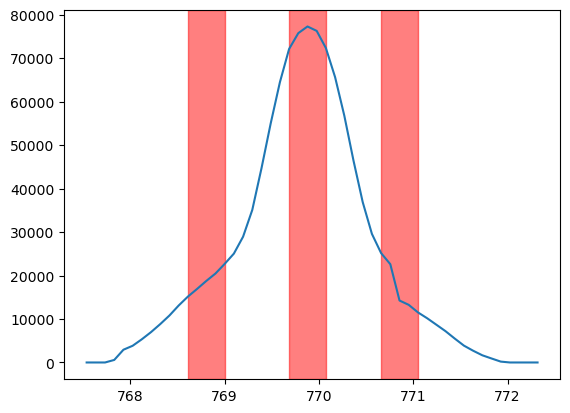

In [28]:
fig, ax = plt.subplots()
ax.plot(spice_window_wvl, np.nansum(spice_window.data[0,:,:,:], axis=(1,2)))
ax.axvspan(spice_window_wvl[11], spice_window_wvl[15], color='red', alpha=0.5)
ax.axvspan(spice_window_wvl[22], spice_window_wvl[26], color='red', alpha=0.5)
ax.axvspan(spice_window_wvl[32], spice_window_wvl[36], color='red', alpha=0.5)

In [31]:
spice_NeVIII_bw_int = np.nansum(spice_window.data[0,11:15,:,:], axis=0)
spice_NeVIII_core_int = np.nansum(spice_window.data[0,22:26,:,:], axis=0)
spice_NeVIII_rw_int = np.nansum(spice_window.data[0,32:36,:,:], axis=0)

In [33]:
ImageBlinker(spice_NeVIII_bw_int[300:500, 100:150], spice_NeVIII_core_int[300:500, 100:150],
              aspect=spice_window.meta['CDELT2']/spice_window.meta['CDELT1'])